### reference : https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_core/py_table_of_contents_core/py_table_of_contents_core.html

In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### read image in

In [2]:
data_scource = 'origin_data/'

In [3]:
train_data_path = os.path.join(data_scource, 'train/')

In [4]:
img = cv2.imread(train_data_path + '1_1.tif')

### get the shape of image

In [5]:
img.shape

(420, 580, 3)

### get the dtype of image

In [6]:
img.dtype

dtype('uint8')

### get different color scale of a image
- uint8	Unsigned integer (0 to 255)

In [7]:
b,g,r = cv2.split(img)

In [8]:
b

array([[  0,  92,  84, ..., 125, 111, 110],
       [  0, 149, 135, ..., 143, 141, 139],
       [  3, 140, 143, ..., 159, 166, 168],
       ..., 
       [  0,  29,  30, ...,  39,  37,  31],
       [  0,  28,  33, ...,  37,  34,  29],
       [  0,  26,  33, ...,  34,  27,  26]], dtype=uint8)

In [9]:
img[:,:,0]

array([[  0,  92,  84, ..., 125, 111, 110],
       [  0, 149, 135, ..., 143, 141, 139],
       [  3, 140, 143, ..., 159, 166, 168],
       ..., 
       [  0,  29,  30, ...,  39,  37,  31],
       [  0,  28,  33, ...,  37,  34,  29],
       [  0,  26,  33, ...,  34,  27,  26]], dtype=uint8)

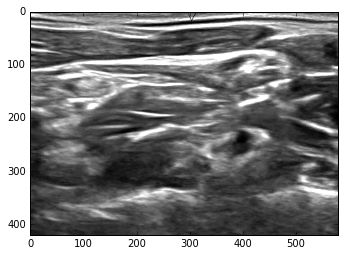

In [10]:
plt.imshow(img)

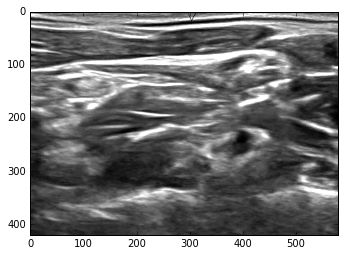

In [11]:
plt.imshow(img,'gray')

### read gray scale

In [12]:
img_gray = cv2.imread(train_data_path + '1_1.tif', cv2.CV_LOAD_IMAGE_GRAYSCALE)

In [13]:
img_gray.shape

(420, 580)

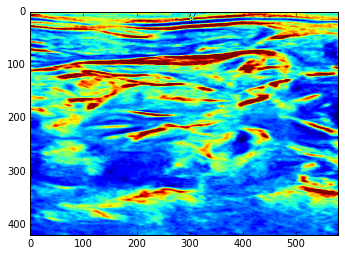

In [14]:
plt.imshow(img_gray)

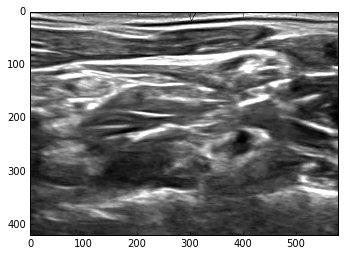

In [15]:
plt.imshow(img_gray, cmap = 'gray')

In [16]:
img_gray[:,:]

array([[  0,  92,  84, ..., 125, 111, 110],
       [  0, 149, 135, ..., 143, 141, 139],
       [  3, 140, 143, ..., 159, 166, 168],
       ..., 
       [  0,  29,  30, ...,  39,  37,  31],
       [  0,  28,  33, ...,  37,  34,  29],
       [  0,  26,  33, ...,  34,  27,  26]], dtype=uint8)

### add border padding

In [17]:
reflect = cv2.copyMakeBorder(img_gray,30,30,30,30,cv2.BORDER_REFLECT)

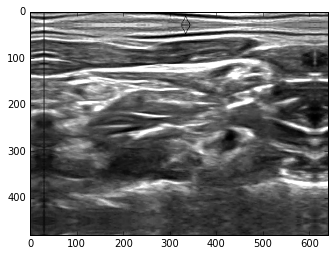

In [18]:
plt.imshow(reflect, cmap = 'gray')

### element wise arithmetic operation
- OpenCV addition is a saturated operation
- Numpy addition is a modulo operation.

### difference between two add

In [19]:
img_gray2 = cv2.imread(train_data_path + '1_2.tif', cv2.CV_LOAD_IMAGE_GRAYSCALE)

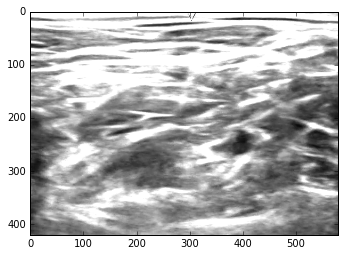

In [20]:
plt.imshow(cv2.add(img_gray,img_gray2),cmap ='gray')

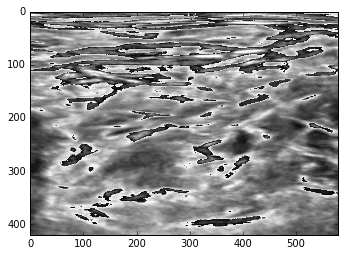

In [21]:
plt.imshow(np.add(img_gray,img_gray2),cmap = 'gray')

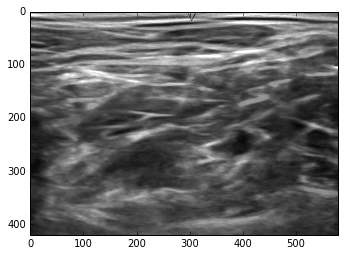

In [22]:
plt.imshow(cv2.addWeighted(img_gray,0.5,img_gray2,0.5,0),cmap = 'gray')

## extracting any part of the image, defining and working with non-rectangular ROI
- try to find the mask of this picture

### notice that opencv use 

In [23]:
logo = cv2.imread('opencv_logo.png')

In [24]:
logo.shape

(500, 500, 3)

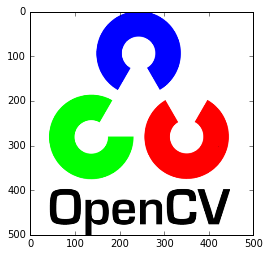

In [25]:
plt.imshow(logo)

### resize the logo png

### For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]
- because use uint8

In [26]:
res_logo = cv2.resize(logo,(int(0.5 * logo.shape[0]), int(0.5 * logo.shape[0])), interpolation = cv2.INTER_AREA)

In [27]:
res_logo.shape

(250, 250, 3)

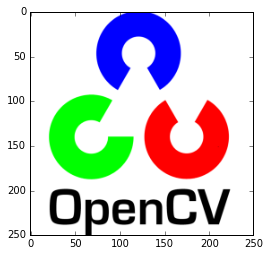

In [28]:
plt.imshow(res_logo)

### pick only white one in logo

In [74]:
blue = np.array([[[255, 255, 255]]], np.uint8)

In [75]:
cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)

array([[[  0,   0, 255]]], dtype=uint8)

In [80]:
WHITE_MIN = np.array([0, 0, 100],np.uint8)
WHITE_MAX = np.array([10, 0, 255],np.uint8)

In [81]:
res_logo_hsv = cv2.cvtColor(res_logo, cv2.COLOR_BGR2HSV)

In [82]:
mask = cv2.inRange(res_logo_hsv, WHITE_MIN, WHITE_MAX)

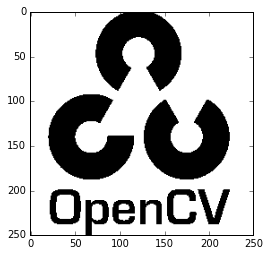

In [91]:
plt.imshow(mask,'gray')

In [85]:
logo_white = cv2.bitwise_and(res_logo,res_logo, mask= mask)

In [87]:
logo_white_inv = cv2.bitwise_not(res_logo,res_logo, mask= mask)

### why this do not translate to grayscale

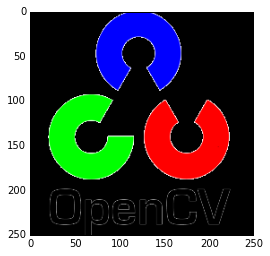

In [93]:
plt.imshow(logo_white_inv, cmap = 'gray')